## 1. Artificial Neural Networks

### 1.1 activation function graph of cv2.ml.ANN_MLP_SIGMOID_SYM

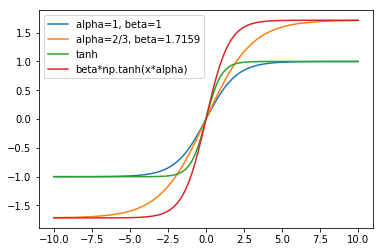

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
alpha = 1
beta  = 1
x = np.linspace(-10, 10, num=100)
y = beta*(1-np.exp(-alpha*x))/(1+np.exp(-alpha*x))
plt.plot(x, y, label='alpha=1, beta=1')

#2
alpha = 2/3
beta  = 1.7159
y = beta*(1-np.exp(-alpha*x))/(1+np.exp(-alpha*x))
plt.plot(x, y, label='alpha=2/3, beta=1.7159')

#3
#y = np.tanh(x)
y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
plt.plot(x, y, label='tanh')

#4
y = beta*np.tanh(x*alpha)
plt.plot(x, y, label='beta*np.tanh(x*alpha)')

plt.legend(loc='best')
plt.show()

### 1.2 AND, OR problems with Single Perceptron

w0.shape= (1, 4)
w0= [[ 2. -1.  2. -1.]]
w1.shape= (3, 1)
w1= [[ 1.50097526]
 [ 1.50153535]
 [-1.50047998]]
w2.shape= (1, 2)
w2= [[0.52631579 0.5       ]]
w3.shape= (1, 2)
w3= [[ 1.9  -0.95]]
ann.predict(x)
[0. 0.] (0.0, array([[-0.3176067]], dtype=float32))
[0. 1.] (0.0, array([[0.08267853]], dtype=float32))
[1. 0.] (0.0, array([[0.08241337]], dtype=float32))
[1. 1.] (0.0, array([[0.91782105]], dtype=float32))


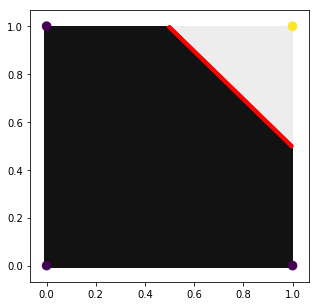

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([2, 1]))
ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+
                        cv2.TERM_CRITERIA_COUNT,1000,1e-5))

#2
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype = np.float32)

y = np.array([0, 0, 0, 1], dtype = np.float32)          # AND
##y = np.array([0, 1, 1, 1], dtype = np.float32)        # OR
target = y.copy()

#3
##ret = ann.train(samples=X, layout=cv2.ml.ROW_SAMPLE, responses=y)
trainData = cv2.ml.TrainData_create(samples=X,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y)
ret = ann.train(trainData)
##ret = ann.train(trainData, flags = cv2.ml.ANN_MLP_NO_OUTPUT_SCALE)
##ret = ann.train(trainData, flags = cv2.ml.ANN_MLP_NO_OUTPUT_SCALE+
##                                       cv2.ml.ANN_MLP_NO_INPUT_SCALE)

#3-1
w0 = ann.getWeights(0)
print('w0.shape=', w0.shape)
print('w0=', w0)

#3-2
w1 = ann.getWeights(1)
print('w1.shape=', w1.shape)
print('w1=', w1)

#3-3
w2 = ann.getWeights(2)
print('w2.shape=', w2.shape)
print('w2=', w2)

#3-4
w3 = ann.getWeights(3)
print('w3.shape=', w3.shape)
print('w3=', w3)

#4
print('ann.predict(x)')
for x in X:    
    print(x, ann.predict(x.reshape(-1, 2)))

#5    
dst = np.zeros((512,512,3), np.uint8)
rows, cols = dst.shape[:2]

for y in range(rows):
    y1 = (rows - y)/rows  # upside-down, [0, 1]
    for x in range(cols):
        x1 = x/cols
        sample = np.array([x1, y1], dtype=np.float32).reshape(-1, 2)
        _, res = ann.predict(sample)
        if int(np.round(res[0])) == 0:
            dst[y, x] = (0, 0, 0)
        else:
            dst[y, x] = (200, 200, 200)
            
####################################cv2.imshow('dst', dst)

#6
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
ret, Z = ann.predict(sample) 
Z = np.round(Z)
Z = Z.reshape(xx.shape)

fig = plt.gcf()
fig.set_size_inches(5,5)

##plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z, colors='red', linewidths=3)
plt.scatter(*X[:, :].T, c=target, s = 75)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

### 1.3 XOR problem 1

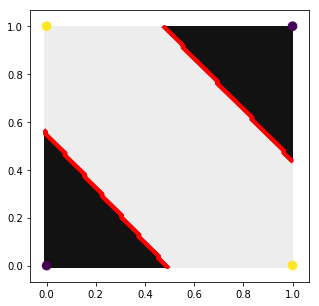

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([2, 2, 1]))
##ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+
                        cv2.TERM_CRITERIA_COUNT,1000,1e-5))

#2
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype = np.float32)

y = np.array([0,1, 1,0], dtype = np.float32)   # XOR
target = y.copy()

#3
##ret=ann.train(samples=X, layout=cv2.ml.ROW_SAMPLE, responses=y)
trainData = cv2.ml.TrainData_create(samples=X,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y)
ret = ann.train(trainData)

#4
ann.save('./data/ann-xor.train')

#5
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()] # xx.flatten(), yy.flatten()
ret, Z = ann.predict(sample) 
Z = np.round(Z)
Z = Z.reshape(xx.shape)

fig = plt.gcf()
fig.set_size_inches(5,5)

##plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z, colors='red', linewidths=3)
plt.scatter(*X[:, :].T, c=target, s = 75)
plt.show()

### 1.4 XOR problem 2: load and infer

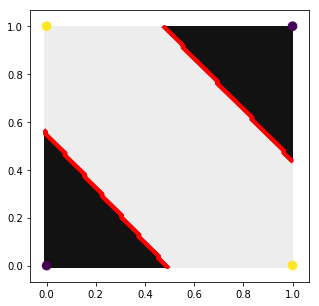

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
mlp_net = cv2.ml.ANN_MLP_create()
ann = mlp_net.load('./data/ann-xor.train')

#2
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype = np.float32)

y = np.array([0,1, 1,0], dtype = np.float32)   # XOR
target = y.copy()

#3
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
ret, Z = ann.predict(sample) 
Z = np.round(Z)
Z = Z.reshape(xx.shape)

fig = plt.gcf()
fig.set_size_inches(5,5)

##plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z, colors='red', linewidths=3)
plt.scatter(*X[:, :].T, c=target, s = 75)
plt.show()

### 1.5 AND, OR, XOR: Two output neurons, One-hot encoding

ann.predict(x)
[0. 0.] [[1.0015728e+00 4.7037774e-04]]
k= 0
[0. 1.] [[-0.0014554   0.99902356]]
k= 1
[1. 0.] [[-0.00320558  0.9995599 ]]
k= 1
[1. 1.] [[1.0016160e+00 4.5735805e-04]]
k= 0


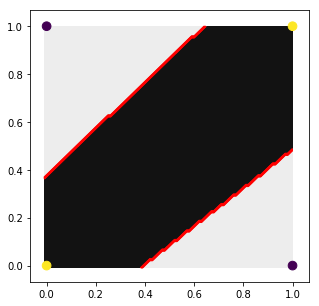

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([2, 2, 2]))
##ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+
                        cv2.TERM_CRITERIA_COUNT,1000,1e-5))

#2
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype = np.float32)

##y = np.array([[1, 0],
##              [1, 0],
##              [1, 0],
##              [0, 1]], dtype = np.float32)   # AND

##y = np.array([[1, 0],
##              [0, 1],
##              [0, 1],
##              [0, 1]], dtype = np.float32) # OR

y = np.array([[1, 0],
              [0, 1],
              [0, 1],           
              [1, 0]], dtype = np.float32) # XOR

target = y.copy()

#3
##ret=ann.train(samples=X, layout=cv2.ml.ROW_SAMPLE, responses=y)
trainData = cv2.ml.TrainData_create(samples=X,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y)
ret = ann.train(trainData)

#4
print('ann.predict(x)')
for x in X:
    _, res = ann.predict(x.reshape(-1, 2))
    print(x, res)
    
    k = np.argmax(res)
    print('k=',k)
    
#5
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
ret, res = ann.predict(sample) 
Z = np.argmax(res, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.gcf()
fig.set_size_inches(5,5)

plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z, colors='red')
plt.scatter(*X[:, :].T, c=target[:,0], s = 75)
plt.show()

### 1.6 four output neurons, one-hot encoding

accuracy= 0.965


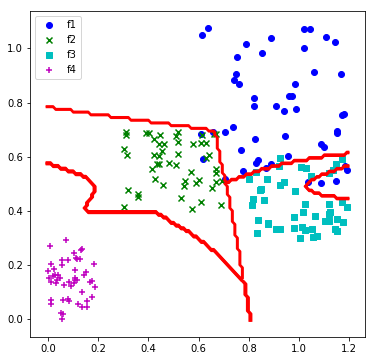

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
N = 50
f1 = (0.6 + 0.6*np.random.rand(N), 0.5+0.6*np.random.rand(N))
f2 = (0.3 + 0.4*np.random.rand(N), 0.4+0.3*np.random.rand(N))
f3 = (0.8 + 0.4*np.random.rand(N), 0.3+0.3*np.random.rand(N))
f4 = (0.2*np.random.rand(N),       0.3*np.random.rand(N))

y_1ofN = np.zeros((4*N, 4), dtype = np.float32) # one-hot-encoding
##X = np.zeros((4*N, 2), dtype = np.float32)    # (x, y) 
##for i in range(N):
##  x = f1[0][i]
##  y = f1[1][i]
##  X[i] = [x,y]
##  y_1ofN[i] = [1,0,0,0]
##  
##  x = f2[0][i]
##  y = f2[1][i]
##  X[N+i] = [x,y]
##  y_1ofN[N+i] = [0,1,0,0]
##    
##  x = f3[0][i]
##  y = f3[1][i]
##  X[2*N+i] = [x,y]
##  y_1ofN[2*N+i] = [0,0,1,0]
##
##  x = f4[0][i]
##  y = f4[1][i]
##  X[3*N+i] = [x,y]
##  y_1ofN[3*N+i] = [0,0,0,1]
  
x = np.hstack((f1[0], f2[0], f3[0],f4[0])).astype(np.float32)
y = np.hstack((f1[1], f2[1], f3[1],f4[1])).astype(np.float32)
X = np.vstack((x, y)).T

y_1ofN[:N,:]     = [1,0,0,0] # one-hot-encoding 
y_1ofN[N:2*N,:]  = [0,1,0,0]
y_1ofN[2*N:3*N,:]= [0,0,1,0]
y_1ofN[3*N:,:]   = [0,0,0,1]

#2
ann = cv2.ml.ANN_MLP_create()
##ann.setLayerSizes(np.array([2, 4]))
##ann.setLayerSizes(np.array([2,5, 4]))
##ann.setLayerSizes(np.array([2, 5, 5, 4]))
ann.setLayerSizes(np.array([2, 5, 5, 5, 4]))

##ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+
                        cv2.TERM_CRITERIA_COUNT,1000,1e-5))
##ret=ann.train(samples=X,layout=cv2.ml.ROW_SAMPLE,responses=y_1ofN)
trainData = cv2.ml.TrainData_create(samples=X,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_1ofN)
ret = ann.train(trainData)

#3
y_target = np.argmax(y_1ofN, axis=1)

ret, res = ann.predict(X)
y_predict = np.argmax(res, axis = 1)
accuracy = np.sum(y_target==y_predict)/len(y_target)
print('accuracy=', accuracy)

#4
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
ret, res = ann.predict(sample) 
Z = np.argmax(res, axis=1)
Z = Z.reshape(xx.shape)

markers= ('o','x','s','+','*','d')
colors = ('b','g','c','m','y','k')
labels = ('f1', 'f2', 'f3', 'f4')

fig = plt.gcf()
fig.set_size_inches(6,6)
##plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z, colors='red', linewidths=2)

for i, k in enumerate(np.unique(y_target)):
    plt.scatter(X[y_target == k, 0],X[y_target==k, 1],
                c=colors[i], marker=markers[i], label=labels[k])
    
plt.legend(loc='best')
plt.show()

### 1.7 IRIS data call

x_train.shape= (120, 4)
y_train.shape= (120, 3)
x_test.shape= (30, 4)
y_test.shape= (30, 3)


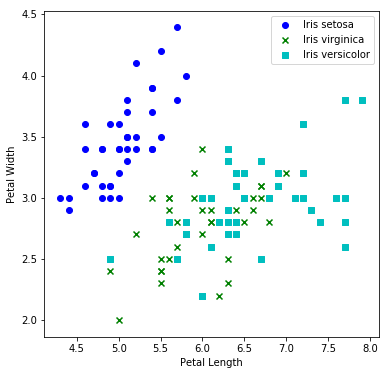

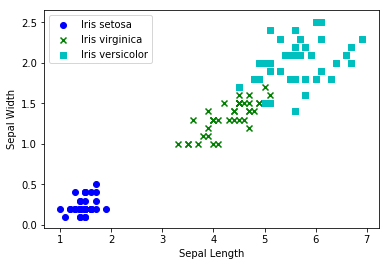

In [7]:
'''
   ref1: https://github.com/leestott/IrisData
   ref2: https://en.wikipedia.org/wiki/Iris_flower_data_set
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
# Petal Length , Petal Width , Sepal Length , Sepal width, and Class
def loadIrisData(fileName):
##  resultList = []
    x_list = []
    y_list = []
    f = open(fileName, 'r')
    for line in f:
        line = line.rstrip('\n')             
        sVals = line.split(',')              
        fVals = list(map(np.float32, sVals))
        x_list.append(fVals[:-3]) # features
        y_list.append(fVals[-3:]) # class, one-hot-encoding  
##      resultList.append(fVals)
    f.close()

    x = np.array(x_list, dtype=np.float32) # features
    y = np.array(y_list, dtype=np.float32) # class, one-hot-encoding

##  data = np.array(resultList, dtype=np.float32) # np.asarray
##  X =  data[:,:-3].copy() # features
##  y = data[:,-3:].copy()  # class, one-hot-encoding
    return x, y

x_train, y_train=loadIrisData('./data/irisTrainData.txt')
x_test,  y_test = loadIrisData('./data/irisTestData.txt')
print('x_train.shape=', x_train.shape)
print('y_train.shape=', y_train.shape)
print('x_test.shape=',  x_test.shape)
print('y_test.shape=',  y_test.shape)

#2
y_target = np.argmax(y_train, axis = 1)

markers= ('o','x','s','+','*','d')
colors = ('b','g','c','m','y','k')
labels = ['Iris setosa','Iris virginica','Iris versicolor']

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
for i, k in enumerate(np.unique(y_target)):
    plt.scatter(x_train[y_target== k, 0], # Petal Length
                x_train[y_target== k, 1], # Petal Width
                c=colors[i], marker=markers[i], label=labels[i])
    
plt.legend(loc='best')
plt.show()

#3
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i, k in enumerate(np.unique(y_target)):
    plt.scatter(x_train[y_target== k, 2], # Sepal Length
                x_train[y_target== k, 3], # Sepal Width
                c=colors[i], marker=markers[i], label=labels[i])
    
plt.legend(loc='best')
plt.show()

### 1.8 IRIS data classification 1

In [8]:
'''
ref1: https://github.com/leestott/IrisData
ref2: https://en.wikipedia.org/wiki/Iris_flower_data_set
'''

import cv2
import numpy as np

#1
# Petal Length , Petal Width , Sepal Length , Sepal width, and Class
def loadIrisData(fileName):
    x_list = []
    y_list = []
    f = open(fileName, 'r')
    for line in f:
        line = line.rstrip('\n')             
        sVals = line.split(',')              
        fVals = list(map(np.float32, sVals))
        x_list.append(fVals[:-3]) # features
        y_list.append(fVals[-3:]) # class, one-hot-encoding  
    f.close()
    x = np.array(x_list, dtype=np.float32) # features
    y = np.array(y_list, dtype=np.float32) # class, one-hot-encoding
    return x, y  

x_train, y_train=loadIrisData('./data/irisTrainData.txt')
x_test,  y_test =loadIrisData('./data/irisTestData.txt')

#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([4, 5, 3]))
##ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,
                     1000,1e-5))

##ret=ann.train(samples=x_train,
##              layout=cv2.ml.ROW_SAMPLE,
##              responses=y_train)

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData)

#3
y_target = np.argmax(y_train, axis=1)
ret, res = ann.predict(x_train)
y_predict= np.argmax(res, axis = 1)
accuracy = np.sum(y_target==y_predict)/len(y_target)
print('x_train: accuracy=', accuracy)

#4
y_target = np.argmax(y_test, axis=1)
ret, res = ann.predict(x_test)
y_predict= np.argmax(res, axis = 1)
accuracy = np.sum(y_target==y_predict)/len(y_target)
print('x_test: accuracy=', accuracy)

x_train: accuracy= 0.975
x_test: accuracy= 1.0


### 1.9 IRIS data classification 2: Loss function with cv2.ml.ANN_MLP_UPDATE_WEIGHTS

train_accuracy[999]=1.0, train_loss=0.36107301712036133


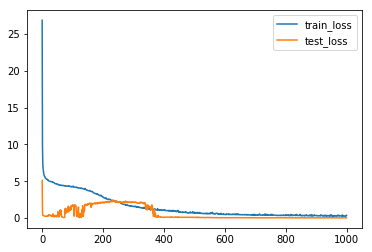

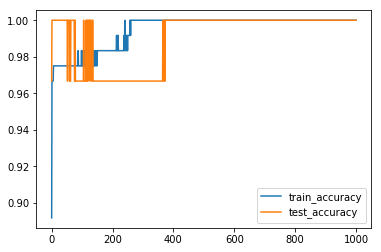

In [9]:

''' 
ref1: https://github.com/leestott/IrisData
ref2: https://en.wikipedia.org/wiki/Iris_flower_data_set
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
# Petal Length , Petal Width , Sepal Length , Sepal width, and Class
def loadIrisData(fileName):
    x_list = []
    y_list = []
    f = open(fileName, 'r')
    for line in f:
        line = line.rstrip('\n')             
        sVals = line.split(',')              
        fVals = list(map(np.float32, sVals))
        x_list.append(fVals[:-3]) # features
        y_list.append(fVals[-3:]) # class, one-hot-encoding  
    f.close()
    x = np.array(x_list, dtype=np.float32) # features
    y = np.array(y_list, dtype=np.float32) # class, one-hot-encoding
    return x, y  

x_train, y_train=loadIrisData('./data/irisTrainData.txt')
x_test,  y_test =loadIrisData('./data/irisTestData.txt')

#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([4, 5, 3]))
##ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,10,1e-5))

train_loss_list = []
train_accuracy_list = []

test_loss_list = []
test_accuracy_list = []

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData) # initial training

#3
iters_num = 1000
for i in range(iters_num):
    ret = ann.train(trainData, flags=cv2.ml.ANN_MLP_UPDATE_WEIGHTS)

#3-1
    y_target = np.argmax(y_train, axis=1)
    ret, res = ann.predict(x_train)
    y_predict = np.argmax(res, axis = 1)
    train_accuracy = np.sum(y_target==y_predict)/len(y_target)
    train_loss = np.sum((y_train-res)**2)

    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

#3-2
    y_target = np.argmax(y_test, axis=1)
    ret, res = ann.predict(x_test)
    y_predict = np.argmax(res, axis = 1)
    test_accuracy = np.sum(y_target==y_predict)/len(y_target)
    test_loss = np.sum((y_test-res)**2)

    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)
    
print('train_accuracy[{}]={}, '.format(i, train_accuracy), end='')
print('train_loss={}'.format(train_loss))

#4
x = np.linspace(0, iters_num, num=iters_num)
plt.plot(x, train_loss_list, label='train_loss')
plt.plot(x, test_loss_list, label='test_loss')

plt.legend(loc='best')
plt.show()

plt.plot(x, train_accuracy_list, label='train_accuracy')
plt.plot(x, test_accuracy_list, label='test_accuracy')
plt.legend(loc='best')
plt.show()

### 1.10 MNIST data call

In [10]:
'''
ref1: http://yann.lecun.com/exdb/mnist/
ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
'''
import gzip
import numpy as np
import cv2

IMAGE_SIZE = 28
PIXEL_DEPTH = 255
NUM_LABELS = 10

#1
def extract_data(filename, num_images):
    '''
    Extract the images into a 4D tensor [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [0, 1].
    '''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##      data = data/PIXEL_DEPTH
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
        return data

def extract_labels(filename, num_images):
    '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
    return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1      
    return t
  
# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
    x_train=extract_data('./data/train-images-idx3-ubyte.gz',  60000)
    y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
    x_test =extract_data('./data/t10k-images-idx3-ubyte.gz',   10000)
    y_test =extract_labels('./data/t10k-labels-idx1-ubyte.gz', 10000)

    if flatten:
        x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
        x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
    if one_hot:
        y_train = ont_hot_encoding(y_train)
        y_test = ont_hot_encoding(y_test)    
    return (x_train, y_train), (x_test, y_test)

#2
(x_train, y_train), (x_test, y_test) = load_MINIST()
print('x_train.shape=', x_train.shape) # (60000, 784)
print('y_train.shape=', y_train.shape) # (60000, 10)
print('x_test.shape=',  x_test.shape)  # (10000, 784)
print('y_test.shape=',  y_test.shape)  # (10000, 10)

dst = np.zeros((20*IMAGE_SIZE, 20*IMAGE_SIZE), dtype=np.uint8)

for i in range(400):
    x = i%20
    y = i//20
    x1 = x*IMAGE_SIZE
    y1 = y*IMAGE_SIZE
    x2 = x1+IMAGE_SIZE
    y2 = y1+IMAGE_SIZE  
  
    img = x_train[i].astype(np.uint8)
    img = img.reshape(IMAGE_SIZE, IMAGE_SIZE)
    dst[y1:y2, x1:x2] = img

#####################################cv2.imshow('MINIST 400', dst)
cv2.waitKey()
cv2.destroyAllWindows()

x_train.shape= (60000, 784)
y_train.shape= (60000, 10)
x_test.shape= (10000, 784)
y_test.shape= (10000, 10)


### 1.11 number recognition using MLP

In [11]:
'''
import cv2
import numpy as np

#1
ann = cv2.ml_ANN_MLP.load('./data/ann-minist_2layer_BP.train')
##ann = cv2.ml_ANN_MLP.load('./data/ann-minist_2layer_100RPROP.train')
##ann = cv2.ml_ANN_MLP.load('./data/ann-minist_3layer_50RPROP.train')

#2
def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(dst, (x, y), 10, (255, 255, 255), -1)
    cv2.imshow('dst', dst)
    
dst = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
cv2.imshow('dst',dst)
cv2.setMouseCallback('dst', onMouse)

mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
font   = cv2.FONT_HERSHEY_SIMPLEX  
x_img  = np.zeros(shape=(28, 28), dtype=np.uint8)

#3
while True:
    key = cv2.waitKey(25)    
    if key == 27: # Press the "ESC" key to exit
        break
        
    elif key == ord('r'): # Press the "r" key to reset the dst image to 0.
        dst[:,:] = 0
        cv2.imshow('dst',dst)
        
    elif key == ord(' '): # Press the space bar to proceed.
        gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        _, contours, _ = cv2.findContours(gray, mode, method)

        for i, cnt in enumerate(contours):
#3-1
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(dst, (x, y), (x+width, y+height), (0,0,255), 2)
            cx, cy = x + width/2, y + height/2
            
            if width > height:
                r = width/2
            else:
                r = height/2
                
##          (cx,cy),r = cv2.minEnclosingCircle(cnt)
            cx, cy, r = int(cx), int(cy), int(r)
            img = gray[cy-r:cy+r, cx-r:cx+r]
            img = cv2.resize(img, dsize=(20, 20),interpolation=cv2.INTER_AREA)            
            x_img[:,:] = 0
            x_img[4:24, 4:24] = img
            x_img = cv2.dilate(x_img, None, 2)
            x_img = cv2.erode(x_img, None, 4)
            cv2.imshow('x_img', x_img)
#3-2
            x_test = np.float32(x_img.flatten())
            _, res = ann.predict(x_test.reshape(-1, 784))
##          print('res=', res)
            y_predict = np.argmax(res, axis = 1)
            print('y_predict=', y_predict)
            digit = int(y_predict[0])
            cv2.putText(dst, str(digit), (x, y), font, 3, (255,0,0), 5)
        
        cv2.imshow('dst',dst)
        
cv2.destroyAllWindows()
'''
print()

### 1.12 MNIST data fitting 1: 2-layers NN, random sampling minibatch

train_accuracy[0]=0.8582666666666666, train_loss=2.153015625
train_accuracy[100]=0.8821833333333333, train_loss=2.067857291666667
train_accuracy[200]=0.9002166666666667, train_loss=1.9856934895833334
train_accuracy[300]=0.9086833333333333, train_loss=1.9596037760416667
train_accuracy[400]=0.9116333333333333, train_loss=1.9393337239583333
train_accuracy[500]=0.9121166666666667, train_loss=1.9393923177083334
train_accuracy[600]=0.9137, train_loss=1.9317580729166666
train_accuracy[700]=0.9141166666666667, train_loss=1.929626171875
train_accuracy[800]=0.9197833333333333, train_loss=1.9120584635416666
train_accuracy[900]=0.9223, train_loss=1.9008731770833334


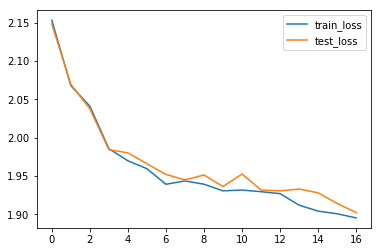

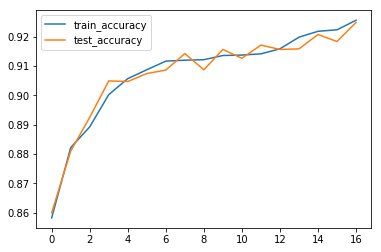

In [12]:
'''
ref1: http://yann.lecun.com/exdb/mnist/
ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
ref3: Deep Learning from Scratch[book]
'''

import gzip
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE_SIZE  = 28
PIXEL_DEPTH = 255
NUM_LABELS  = 10

#1
def extract_data(filename, num_images):
    '''
    Extract the images into a 4D tensor [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [0, 1].
    '''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##      data = data/PIXEL_DEPTH
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
        return data

def extract_labels(filename, num_images):
    '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
    return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1  
    return t

# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
    x_train=extract_data('./data/train-images-idx3-ubyte.gz',  60000)
    y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
    x_test =extract_data('./data/t10k-images-idx3-ubyte.gz',   10000)
    y_test =extract_labels('./data/t10k-labels-idx1-ubyte.gz', 10000)

    if flatten:
        x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
        x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
    if one_hot:
        y_train = ont_hot_encoding(y_train)
        y_test = ont_hot_encoding(y_test)    
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_MINIST()

#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([784, 100, 10]))
ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,1,1e-5))

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData)

#3
train_loss_list     = []
train_accuracy_list = []
test_loss_list      = []
test_accuracy_list  = []

batch_size = 1000
train_size = 60000

iters_num  = 1000 #10000
iter_per_epoch = train_size//batch_size

for i in range(iters_num):
#3-1
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
  
    trainData = cv2.ml.TrainData_create(samples=x_batch,
                                        layout=cv2.ml.ROW_SAMPLE,
                                        responses=y_batch)    
    ret = ann.train(trainData, flags=cv2.ml.ANN_MLP_UPDATE_WEIGHTS)

#3-2
    if i % iter_per_epoch == 0:    
        y_target = np.argmax(y_train, axis=1)
        ret, res_train = ann.predict(x_train)
        y_predict = np.argmax(res_train, axis = 1)
        train_accuracy = np.sum(y_target==y_predict)/len(y_target)
        train_loss = np.sum((y_train-res_train)**2)
        train_loss /= x_train.shape[0] # 60000
        train_accuracy_list.append(train_accuracy)
        train_loss_list.append(train_loss)

        y_target = np.argmax(y_test, axis=1)
        ret, res_test = ann.predict(x_test)
        y_predict = np.argmax(res_test, axis = 1)
        test_accuracy = np.sum(y_target==y_predict)/len(y_target)
        test_loss = np.sum((y_test-res_test)**2)
        test_loss /= x_test.shape[0] # 10000
        test_accuracy_list.append(test_accuracy)
        test_loss_list.append(test_loss)
    
    if i%100 == 0: #1000
        print('train_accuracy[{}]={}, '.format(i, train_accuracy), end='')
        print('train_loss={}'.format(train_loss))

#4
ann.save('./data/ann-minist_2layer_BP.train')

x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.plot(x, test_loss_list, label='test_loss')

plt.legend(loc='best')
plt.show()

plt.plot(x, train_accuracy_list, label='train_accuracy')
plt.plot(x, test_accuracy_list, label='test_accuracy')
plt.legend(loc='best')
plt.show()

### 1.13 MNIST data fitting 2: cv2.ml.ANN_MLP_RPROP

train_accuracy[0]=0.9280333333333334, test_accuracy=0.903
train_accuracy[1]=0.9226833333333333, test_accuracy=0.8878
train_accuracy[2]=0.9163333333333333, test_accuracy=0.8807
train_accuracy[3]=0.9225166666666667, test_accuracy=0.8912
train_loss=0.6432939453125, test_loss=0.72040380859375


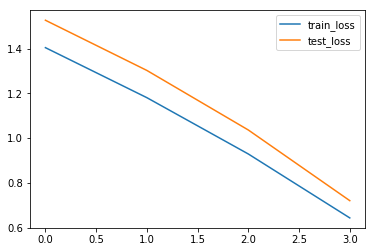

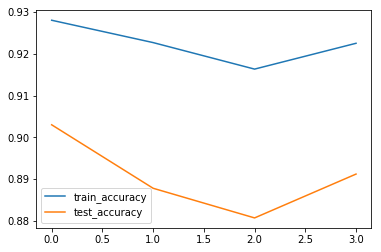

In [13]:
'''
ref1: http://yann.lecun.com/exdb/mnist/
ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
'''

import gzip
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE_SIZE  = 28
PIXEL_DEPTH = 255
NUM_LABELS  = 10

#1
def extract_data(filename, num_images):
    '''
    Extract the images into a 4D tensor [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [0, 1].
    '''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##      data = data/PIXEL_DEPTH
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
        return data

def extract_labels(filename, num_images):
    '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
    return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1      
    return t
  
# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
    x_train=extract_data('./data/train-images-idx3-ubyte.gz',60000)
    y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
    x_test=extract_data('./data/t10k-images-idx3-ubyte.gz',10000)
    y_test=extract_labels('./data/t10k-labels-idx1-ubyte.gz',10000)

    if flatten:
        x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
        x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
    if one_hot:
        y_train = ont_hot_encoding(y_train)
        y_test = ont_hot_encoding(y_test)    
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_MINIST()

#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([784, 100, 10]))
##ann.setLayerSizes(np.array([784, 50, 50, 10]))

##ann.setTrainMethod(cv2.ml.ANN_MLP_RPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,20,1e-5))

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData)

#3
train_loss_list     = []
train_accuracy_list = []
test_loss_list      = []
test_accuracy_list  = []

train_size = 60000
iters_num  = 4 #100

for i in range(iters_num):
    ret = ann.train(trainData, flags=cv2.ml.ANN_MLP_UPDATE_WEIGHTS)

    y_target = np.argmax(y_train, axis=1)
    ret, res_train = ann.predict(x_train)
    y_predict = np.argmax(res_train, axis = 1)
    train_accuracy = np.sum(y_target==y_predict)/len(y_target)
    train_loss = np.sum((y_train-res_train)**2)
    train_loss /= x_train.shape[0] # 60000
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    y_target = np.argmax(y_test, axis=1)
    ret, res_test = ann.predict(x_test)
    y_predict = np.argmax(res_test, axis = 1)
    test_accuracy = np.sum(y_target==y_predict)/len(y_target)
    test_loss = np.sum((y_test-res_test)**2)
    test_loss /= x_test.shape[0] # 10000
    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)

    if i%1 == 0: #10
        print('train_accuracy[{}]={}, '.format(i, train_accuracy), end='')
        print('test_accuracy={}'.format(test_accuracy))
    
print('train_loss={}, '.format(train_loss), end='')
print('test_loss={}'.format(test_loss))
  
#4
ann.save('./data/ann-minist_2layer_100RPROP.train')
##ann.save('./data/ann-minist_3layer_50RPROP.train')

x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.plot(x, test_loss_list, label='test_loss')

plt.legend(loc='best')
plt.show()

plt.plot(x, train_accuracy_list, label='train_accuracy')
plt.plot(x, test_accuracy_list, label='test_accuracy')
plt.legend(loc='best')
plt.show()

## 2. Deep Neural Networks

### 2.1 MLP fitting of XOR using Tensorflow

In [14]:
import tensorflow as tf
import numpy as np
import new_freeze_graph

#1
x_train = [[0,0], [0,1], [1,0], [1,1]] # train input
y_train = [[1,0], [0,1], [0,1], [1,0]] # one-hot encoding, target

learning_rate = 0.1
n_input  = 2  # input nodes
n_hidden = 2  # hidden nodes
n_class  = 2  # output nodes

#2
X = tf.placeholder('float', [None, n_input])
Y = tf.placeholder('float', [None, n_class ]) # target label

# hidden layer
W1 = tf.Variable(tf.random_normal([n_input, n_hidden]))
b1 = tf.Variable(tf.random_normal([n_hidden]))
hidden_layer= tf.nn.sigmoid(tf.matmul(X,W1) + b1)

# output layer
W2 = tf.Variable(tf.random_normal([n_hidden, n_class]))
b2 = tf.Variable(tf.random_normal([n_class]))

output_layer = tf.nn.sigmoid(tf.matmul(hidden_layer, W2)+b2)
#y_predict= tf.identity(output_layer, name='identity')
y_predict = tf.nn.softmax(output_layer, name='softmax')

#3 loss and optimizer
loss =  tf.reduce_mean(tf.square(Y-y_predict)) 
#loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(y_predict), 1))  # cross_entropy

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#4 Train
saver = tf.train.Saver()

print("session start...")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch  in range(5001):      
        sess.run(optimizer,feed_dict={X: x_train, Y: y_train })
        if epoch%1000 == 0:
            print(epoch , sess.run(loss, feed_dict={X:x_train, Y:y_train}))
                
    saver.save(sess, 'dnn/XOR_model.ckpt')
    tf.train.write_graph(sess.graph.as_graph_def(), 'dnn/', 'XOR_graph.pb')

    # test trained model
    predict = tf.argmax(y_predict, 1)
    target  = tf.argmax(Y, 1)
    print('predict:', sess.run(predict, feed_dict={X: x_train}))
    print('target:', sess.run(target,   feed_dict={Y: y_train}))

    correct=tf.equal(tf.argmax(y_predict,1),tf.argmax(Y,1))#tf.equal(predict,target)     
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    print('accuracy: %.2f'%sess.run(accuracy*100,feed_dict={X:x_train, Y:y_train}))
##  print("accuracy %s"%(100*accuracy.eval({X: x_train, Y: y_train}))) 
         
#5
new_freeze_graph.freeze_graph(input_graph='./dnn/XOR_graph.pb',
                              input_checkpoint='./dnn/XOR_model.ckpt',
                              output_graph='./dnn/XOR_frozen_graph.pb',
                              output_node_names='softmax',
                              input_saver=None,input_binary=False,restore_op_name=None,
                              filename_tensor_name=None, clear_devices=True, initializer_nodes=None)

session start...
0 0.2580584
1000 0.16123065
2000 0.16118407
3000 0.16117327
4000 0.16116911
5000 0.16116713
predict: [0 0 1 0]
target: [0 1 1 0]
accuracy: 75.00
INFO:tensorflow:Restoring parameters from ./dnn/XOR_model.ckpt
INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


### 2.2 XOR classification of Tensorflow

[0. 0.] [[0.7310582  0.26894185]]
predict = 0
[0. 1.] [[0.2689421 0.7310579]]
predict = 1
[1. 0.] [[0.2689421  0.73105794]]
predict = 1
[1. 1.] [[0.49999973 0.50000024]]
predict = 1


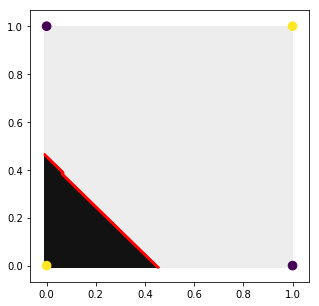

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#1
net = cv2.dnn.readNetFromTensorflow('../OpenCV_Python_code/dnn/XOR_frozen_graph.pb')

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype = np.float32)

y = np.array([[1, 0],
              [0, 1],
              [0, 1],           
              [1, 0]], dtype = np.float32) # XOR

#2  
for x in X:
    blob = cv2.dnn.blobFromImage(x)  # blob.shape =  (1,1,1,2)
##  blob = x.reshape((1, 1, 1, 2))
    net.setInput(blob)
       
    res = net.forward()
    print(x, res)
    
    predict = np.argmax(res)
    print('predict =', predict )

#3
h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.float32(np.c_[xx.ravel(), yy.ravel()])
sample = sample.reshape((-1, 1, 1,  2)) # sample.reshape((len(sample),1,1,2))
net.setInput(sample)
res = net.forward()

Z = np.argmax(res, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.gcf()
fig.set_size_inches(5,5)

plt.contourf(xx, yy, Z, cmap=plt.cm.gray)
plt.contour(xx, yy, Z,  colors='red')
plt.scatter(*X[:, :].T, c=y[:,0], s = 75)
plt.show()

### 2.3 MNIST MLP fitting using Tensorflow

In [16]:
import tensorflow as tf
import new_freeze_graph
from tensorflow.examples.tutorials.mnist import input_data

#1
mnist = input_data.read_data_sets('dnn/', one_hot=True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

#2
learning_rate = 0.01
n_input    = 784 # input nodes
n_hidden   = 100 # hidden nodes
n_class    = 10  # output nodes
batch_size = 400 # minibatch size

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class]) # target label

initializer = tf.initializers.random_normal()

# hidden layer
W1 = tf.Variable(initializer([n_input, n_hidden]))
b1    = tf.Variable(initializer([n_hidden]))
hidden_layer= tf.nn.sigmoid(tf.matmul(X,W1) + b1)

# output layer
W2 = tf.Variable(initializer([n_hidden, n_class]))
b2 = tf.Variable(initializer([n_class]))
output_layer = tf.nn.sigmoid(tf.matmul(hidden_layer, W2)+b2)
output_layer = tf.matmul(hidden_layer, W2)+b2
y_predict = tf.nn.softmax(output_layer, name='softmax')

# loss and optimizer
##loss =  tf.reduce_mean(tf.square(Y-y_predict)) 
loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(y_predict), axis=1)) # cross_entropy
##optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#3
saver = tf.train.Saver() 
print('session start...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch  in range(10001):
        x_batch, y_batch = mnist.train.next_batch(batch_size)      
        sess.run(optimizer,feed_dict={X: x_batch, Y: y_batch })
        
        if epoch%1000 == 0:
            print(epoch , sess.run(loss, feed_dict={X:x_train, Y:y_train}))
            
    # Save model: checkpoint, graph.pb
    saver.save(sess, 'dnn/MNIST_MLP_model.ckpt')
    tf.train.write_graph(sess.graph.as_graph_def(), 'dnn/', 'MNIST_MLP_graph.pb')

    # accuracy
    correct=tf.equal(tf.argmax(y_predict,1),tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    print('train accuracy:%.2f'%sess.run(accuracy*100,feed_dict={X:x_train, Y:y_train}))
    print('test accuracy :%.2f'%sess.run(accuracy*100,feed_dict={X:x_test, Y:y_test}))
    
#4
new_freeze_graph.freeze_graph(input_graph='./dnn/MNIST_MLP_graph.pb',
                              input_checkpoint='./dnn/MNIST_MLP_model.ckpt',
                              output_graph='./dnn/MNIST_MLP_frozen_graph.pb',
                              output_node_names='softmax',
                              input_saver=None,input_binary=False,restore_op_name=None,
                              filename_tensor_name=None, clear_devices=True, initializer_nodes=None)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting dnn/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting dnn/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting dnn/t10k-images-idx3-ubyte.gz
Extracting dnn/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
session start...
0 8.007404
1000 0.08073098
2000 0.028946707
3000 0.010787635
4000 0.0046358327
5000 0.0019132413
6000 0.0009966374
7000 0.00053042
8000 0.00030339323
9000 0.01880795
10000 0.0012046507
train accuracy:100.00
test accuracy :96.53
INFO:tensorflow:Restoring parameters from ./dnn/MNIST_MLP_model.ckpt
INFO:tensorflow

In [17]:
'''
import tensorflow as tf
import new_freeze_graph

#1
def mnist_load():
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

    # Train set
    # Image
    train_x = train_x.reshape([train_x.shape[0], -1])
    train_x = train_x.astype('float32') / 255
    # Label
    train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
  
    # Test set
    # Image
    test_x = test_x.reshape([test_x.shape[0], -1])
    test_x = test_x.astype('float32') / 255
    # Label
    test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)
      
    return (train_x, train_y), (test_x, test_y)

(x_train, y_train), (x_test, y_test) = mnist_load()
buffer_size = x_train.shape[0] + x_test.shape[0]

dataset = tf.data.Dataset.from_tensor_slices(({"image": x_train}, y_train))
dataset = dataset.shuffle(buffer_size).repeat().batch(100) #minibatch size
iterator = dataset.make_one_shot_iterator()
next_batch = iterator.get_next()

#2
learning_rate = 0.01
n_input    = 784 # input nodes
n_hidden   = 100 # hidden nodes
n_class    = 10  # output nodes
batch_size = 400 # minibatch size

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class]) # target label

initializer = tf.initializers.random_normal()

# hidden layer
W1 = tf.Variable(initializer([n_input, n_hidden]))
b1    = tf.Variable(initializer([n_hidden]))
hidden_layer= tf.nn.sigmoid(tf.matmul(X,W1) + b1)

# output layer
W2 = tf.Variable(initializer([n_hidden, n_class]))
b2 = tf.Variable(initializer([n_class]))
output_layer = tf.nn.sigmoid(tf.matmul(hidden_layer, W2)+b2)
output_layer = tf.matmul(hidden_layer, W2)+b2
y_predict = tf.nn.softmax(output_layer, name='softmax')

# loss and optimizer
##loss =  tf.reduce_mean(tf.square(Y-y_predict)) 
loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(y_predict), axis=1)) # cross_entropy
##optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#3
saver = tf.train.Saver()
print('session start...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch  in range(1001): #10000
        x_batch, y_batch = sess.run(next_batch)      
        sess.run(optimizer,feed_dict={X: x_batch['image'], Y: y_batch })
        
        if epoch%1000 == 0:
            print(epoch, '|', sess.run(loss, feed_dict={X: x_batch['image'], Y: y_batch}))
            
    # Save model: checkpoint, graph.pb
    saver.save(sess, 'dnn/MNIST_MLP_model.ckpt')
    tf.train.write_graph(sess.graph.as_graph_def(), 'dnn/', 'MNIST_MLP_graph.pb')

    # accuracy
    correct=tf.equal(tf.argmax(y_predict,1),tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    print('train accuracy:%.2f'%sess.run(accuracy*100,feed_dict={X:x_train, Y:y_train}))
    print('test accuracy :%.2f'%sess.run(accuracy*100,feed_dict={X:x_test, Y:y_test}))
    
#4
new_freeze_graph.freeze_graph(input_graph='./dnn/MNIST_MLP_graph.pb',
                              input_checkpoint='./dnn/MNIST_MLP_model.ckpt',
                              output_graph='./dnn/MNIST_MLP_frozen_graph.pb',
                              output_node_names='softmax',
                              input_saver=None,input_binary=False,restore_op_name=None,
                              filename_tensor_name=None, clear_devices=True, initializer_nodes=None)
                              
'''
print()

### 2.4 MNIST CNN fitting using Tensorflow

Extracting ./dnn/train-images-idx3-ubyte.gz
Extracting ./dnn/train-labels-idx1-ubyte.gz
Extracting ./dnn/t10k-images-idx3-ubyte.gz
Extracting ./dnn/t10k-labels-idx1-ubyte.gz
x_train.shape= (55000, 784)
y_train.shape= (55000, 10)
Y1.shape= (?, 28, 28, 32)
P1.shape= (?, 14, 14, 32)
Y2.shape= (?, 14, 14, 64)
P2.shape= (?, 7, 7, 64)
Y3.shape= (?, 7, 7, 128)
P3.shape= (?, 4, 4, 128)
_P3.shape= (?, 2048)
Y4.shape= (?, 1024)
output.shape= (?, 10)
X.shape= (?, 28, 28, 1)
Y.shape= (?, 10)
Ylogits.shape= (?, 10)
y_predict.shape= (?, 10)
iter_per_epoch= 137
session start...
epoch=0, loss=1.58242296079432
epoch=1, loss=0.09278998760520106
epoch=2, loss=0.05725288351685026
train end..
test accuracy :98.13
train accuracy:98.32


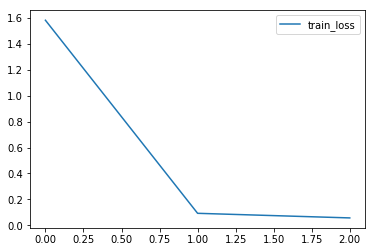

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import new_freeze_graph
%matplotlib inline

#1
mnist = input_data.read_data_sets("./dnn/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels
##x_train = x_train.reshape(-1, 28, 28, 1)
##x_test  = x_test.reshape(-1, 28, 28, 1)
print("x_train.shape=", x_train.shape)
print("y_train.shape=", y_train.shape)


#2, Define Tensorflow model
K = 32       # convolutional layer 1 output
L = 64       # convolutional layer 2 output
M = 128      # convolutional layer 3 output
N = 1024     # fully connected layer output
n_class = 10 # output layer

##tf.set_random_seed(0)
def CNN(x):
# weights
    W1 = tf.Variable(tf.random_normal([3, 3, 1, K], stddev=0.1))# 3x3 patch, 1 input channel, K output channel
    W2 = tf.Variable(tf.random_normal([3, 3, K, L], stddev=0.1))# 3x3xK conv, L outputs
    W3 = tf.Variable(tf.random_normal([3, 3, L, M], stddev=0.1))# 3x3xL conv, M outputs
    W4 = tf.Variable(tf.random_normal([M*4*4, N],   stddev=0.1))# FC Mx4x4 inputs, N outputs
    W5 = tf.Variable(tf.random_normal([N, n_class], stddev=0.1))# FC N inputs, 10 outputs
# bias
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
    B5 = tf.Variable(tf.constant(0.1, tf.float32, [n_class]))

    Y1 = tf.nn.relu(tf.nn.conv2d(x, W1,
                    strides=[1,1,1,1],padding='SAME')+ B1)
    print('Y1.shape=', Y1.shape) # Y1.shape= (?, 28, 28, 32)
                   
    P1 = tf.nn.max_pool(Y1, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P1.shape=', P1.shape) # P1.shape= (?, 14, 14, 32)
                 
    Y2 = tf.nn.relu(tf.nn.conv2d(P1, W2,
                    strides=[1,1,1,1], padding='SAME')+ B2)
    print('Y2.shape=', Y2.shape) # Y2.shape= (?, 14, 14, 64)
    
    P2 = tf.nn.max_pool(Y2, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P2.shape=', P2.shape) # P2.shape= (?, 7, 7, 64)
    
    Y3 = tf.nn.relu(tf.nn.conv2d(P2, W3,
                    strides=[1,1,1,1], padding='SAME')+ B3)
    print('Y3.shape=', Y3.shape) # Y3.shape= (?, 7, 7, 128)
        
    P3 = tf.nn.max_pool(Y3, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P3.shape=', P3.shape) # P3.shape= (?, 4, 4, 128)
                 
    _P3 = tf.reshape(P3, shape=[-1, M*4*4])
    print('_P3.shape=', _P3.shape)   # _P3.shape= (?, 2048)
    
    Y4 = tf.nn.relu(tf.matmul(_P3, W4) + B4)
    print('Y4.shape=', Y4.shape) # Y4.shape = (?, 1024)

    output = tf.matmul(Y4, W5) + B5
    print('output.shape=', output.shape) # output.shape= (?, 10)
    return output

#3
X  = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32,  [None, n_class])
Ylogits   = CNN(X)
y_predict = tf.nn.softmax(Ylogits, name='softmax')
print('X.shape=', X.shape) # X.shape= (?, 28, 28, 1)
print('Y.shape=', Y.shape) # Y.shape= (?, 10)
print('Ylogits.shape=', Ylogits.shape) # Ylogits.shape= (?, 10)
print('y_predict.shape=', y_predict.shape)#y_predict.shape= (?, 10)

##cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y)
loss = tf.reduce_mean(cross_entropy)

##optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
optimizer  = tf.train.AdamOptimizer(0.001).minimize(loss)

batch_size = 400
iter_per_epoch = mnist.train.num_examples//batch_size
print('iter_per_epoch=', iter_per_epoch)

#4
train_loss_list     = []
saver = tf.train.Saver() 
print('session start...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
               
    for epoch in range(3): #100
        avg_loss = 0
        for i in range(iter_per_epoch): # mini batch           
            x_batch, y_batch = mnist.train.next_batch(batch_size)          
            x_batch = x_batch.reshape(-1, 28, 28, 1) 
            sess.run(optimizer,feed_dict={X: x_batch, Y: y_batch })
            loss_batch = sess.run(loss, feed_dict={X:x_batch, Y:y_batch})
            avg_loss += loss_batch
        avg_loss /= iter_per_epoch
        train_loss_list.append(avg_loss)
        print('epoch={}, loss={}'.format(epoch, avg_loss))
    print('train end..')

    # Save model: checkpoint, graph.pb
    saver.save(sess, 'dnn/MNIST_CNN_model.ckpt')
    tf.train.write_graph(sess.graph.as_graph_def(), 'dnn/', 'MNIST_CNN_graph.pb')
    
    correct = tf.equal(tf.argmax(y_predict, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    x_test  = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.reshape(-1, 28, 28, 1)
    print('test accuracy :%.2f'%sess.run(accuracy*100,feed_dict={X:x_test, Y:y_test}))
    print('train accuracy:%.2f'%sess.run(accuracy*100,feed_dict={X:x_train[:10000], Y:y_train[:10000]}))
       
#5
#new_freeze_graph.freeze_graph(input_graph='./dnn/MNIST_CNN_graph.pb',
#                              input_checkpoint='./dnn/MNIST_CNN_model.ckpt',
#                              output_graph='./dnn/MNIST_CNN_frozen_graph.pb',
#                              output_node_names='softmax',
#                              input_saver=None,input_binary=False,restore_op_name=None,
#                              filename_tensor_name=None, clear_devices=True, initializer_nodes=None)

#6
x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.legend(loc='best')
plt.show()

Y1.shape= (?, 28, 28, 32)
P1.shape= (?, 14, 14, 32)
Y2.shape= (?, 14, 14, 64)
P2.shape= (?, 7, 7, 64)
Y3.shape= (?, 7, 7, 128)
P3.shape= (?, 4, 4, 128)
_P3.shape= (?, 2048)
Y4.shape= (?, 1024)
output.shape= (?, 10)
X.shape= (?, 28, 28, 1)
Y.shape= (?, 10)
Ylogits.shape= (?, 10)
y_predict.shape= (?, 10)
iter_per_epoch= 100
session start...
epoch=0, loss=2.0191977263242005
epoch=1, loss=0.1693011849373579
epoch=2, loss=0.11315473049879074
train end..
test accuracy :97.19
train accuracy:97.10


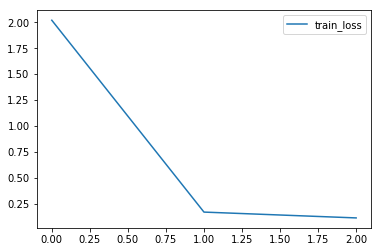

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import new_freeze_graph
%matplotlib inline

#1
def mnist_load():
    (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

    # Train set
    # Image
    train_x = train_x.reshape([train_x.shape[0], -1])
    train_x = train_x.astype('float32') / 255
    # Label
    train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
  
    # Test set
    # Image
    test_x = test_x.reshape([test_x.shape[0], -1])
    test_x = test_x.astype('float32') / 255
    # Label
    test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)
      
    return (train_x, train_y), (test_x, test_y)

(x_train, y_train), (x_test, y_test) = mnist_load()
buffer_size = x_train.shape[0] + x_test.shape[0]

dataset = tf.data.Dataset.from_tensor_slices(({"image": x_train}, y_train))
dataset = dataset.shuffle(buffer_size).repeat().batch(100) #minibatch size
iterator = dataset.make_one_shot_iterator()
next_batch = iterator.get_next()

#2, Define Tensorflow model
K = 32       # convolutional layer 1 output
L = 64       # convolutional layer 2 output
M = 128      # convolutional layer 3 output
N = 1024     # fully connected layer output
n_class = 10 # output layer

##tf.set_random_seed(0)
def CNN(x):
# weights
    W1 = tf.Variable(tf.random_normal([3, 3, 1, K], stddev=0.1))# 3x3 patch, 1 input channel, K output channel
    W2 = tf.Variable(tf.random_normal([3, 3, K, L], stddev=0.1))# 3x3xK conv, L outputs
    W3 = tf.Variable(tf.random_normal([3, 3, L, M], stddev=0.1))# 3x3xL conv, M outputs
    W4 = tf.Variable(tf.random_normal([M*4*4, N],   stddev=0.1))# FC Mx4x4 inputs, N outputs
    W5 = tf.Variable(tf.random_normal([N, n_class], stddev=0.1))# FC N inputs, 10 outputs
# bias
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
    B5 = tf.Variable(tf.constant(0.1, tf.float32, [n_class]))

    Y1 = tf.nn.relu(tf.nn.conv2d(x, W1,
                    strides=[1,1,1,1],padding='SAME')+ B1)
    print('Y1.shape=', Y1.shape) # Y1.shape= (?, 28, 28, 32)
                   
    P1 = tf.nn.max_pool(Y1, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P1.shape=', P1.shape) # P1.shape= (?, 14, 14, 32)
                 
    Y2 = tf.nn.relu(tf.nn.conv2d(P1, W2,
                    strides=[1,1,1,1], padding='SAME')+ B2)
    print('Y2.shape=', Y2.shape) # Y2.shape= (?, 14, 14, 64)
    
    P2 = tf.nn.max_pool(Y2, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P2.shape=', P2.shape) # P2.shape= (?, 7, 7, 64)
    
    Y3 = tf.nn.relu(tf.nn.conv2d(P2, W3,
                    strides=[1,1,1,1], padding='SAME')+ B3)
    print('Y3.shape=', Y3.shape) # Y3.shape= (?, 7, 7, 128)
        
    P3 = tf.nn.max_pool(Y3, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], padding='SAME')
    print('P3.shape=', P3.shape) # P3.shape= (?, 4, 4, 128)
                 
    _P3 = tf.reshape(P3, shape=[-1, M*4*4])
    print('_P3.shape=', _P3.shape)   # _P3.shape= (?, 2048)
    
    Y4 = tf.nn.relu(tf.matmul(_P3, W4) + B4)
    print('Y4.shape=', Y4.shape) # Y4.shape = (?, 1024)

    output = tf.matmul(Y4, W5) + B5
    print('output.shape=', output.shape) # output.shape= (?, 10)
    return output

#3
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32,  [None, n_class])
Ylogits   = CNN(X)
y_predict = tf.nn.softmax(Ylogits, name='softmax')
print('X.shape=', X.shape) # X.shape= (?, 28, 28, 1)
print('Y.shape=', Y.shape) # Y.shape= (?, 10)
print('Ylogits.shape=', Ylogits.shape) # Ylogits.shape= (?, 10)
print('y_predict.shape=', y_predict.shape)#y_predict.shape= (?, 10)

##cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y)
loss = tf.reduce_mean(cross_entropy)

##optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
optimizer  = tf.train.AdamOptimizer(0.001).minimize(loss)

batch_size = 400
iter_per_epoch = 100
print('iter_per_epoch=', iter_per_epoch)

#4
train_loss_list     = []
saver = tf.train.Saver() 
print('session start...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
               
    for epoch in range(3): #100
        avg_loss = 0
        for i in range(iter_per_epoch): # mini batch           
            x_batch, y_batch = sess.run(next_batch)        
            x_batch['image'] = x_batch['image'].reshape(-1, 28, 28, 1) 
            sess.run(optimizer,feed_dict={X: x_batch['image'], Y: y_batch })
            loss_batch = sess.run(loss, feed_dict={X:x_batch['image'], Y:y_batch})
            avg_loss += loss_batch
        avg_loss /= iter_per_epoch
        train_loss_list.append(avg_loss)
        print('epoch={}, loss={}'.format(epoch, avg_loss))
    print('train end..')

    # Save model: checkpoint, graph.pb
    saver.save(sess, 'dnn/MNIST_CNN_model.ckpt')
    tf.train.write_graph(sess.graph.as_graph_def(), 'dnn/', 'MNIST_CNN_graph.pb')
    
    correct = tf.equal(tf.argmax(y_predict, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    x_test  = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.reshape(-1, 28, 28, 1)
    print('test accuracy :%.2f'%sess.run(accuracy*100,feed_dict={X:x_test, Y:y_test}))
    print('train accuracy:%.2f'%sess.run(accuracy*100,feed_dict={X:x_train[:10000], Y:y_train[:10000]}))
       
#5
#new_freeze_graph.freeze_graph(input_graph='./dnn/MNIST_CNN_graph.pb',
#                              input_checkpoint='./dnn/MNIST_CNN_model.ckpt',
#                              output_graph='./dnn/MNIST_CNN_frozen_graph.pb',
#                              output_node_names='softmax',
#                              input_saver=None,input_binary=False,restore_op_name=None,
#                              filename_tensor_name=None, clear_devices=True, initializer_nodes=None)

#6
x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.legend(loc='best')
plt.show()

### 2.5 digit recognition using Tensorflow

In [20]:
'''
import cv2
import numpy as np

#1
net = cv2.dnn.readNetFromTensorflow('./dnn/MNIST_MLP_frozen_graph.pb')
#net = cv2.dnn.readNetFromTensorflow('./dnn/MINIST_CNN_frozen_graph2.pb')

#2
def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(dst, (x, y), 15, (255, 255, 255), -1)
    cv2.imshow('dst', dst)
    
dst = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
cv2.namedWindow('dst')
cv2.setMouseCallback('dst', onMouse)


mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
font = cv2.FONT_HERSHEY_SIMPLEX
x_img = np.zeros(shape=(28, 28), dtype=np.uint8)

#3
while True:
    key = cv2.waitKey(25)    
    if key == 27: 
        break;
    elif key == ord('r'):
        dst[:,:] = 0
        cv2.imshow('dst',dst)
    elif key == ord(' '):
        gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        _, contours, _ = cv2.findContours(gray, mode, method)

        for i, cnt in enumerate(contours):
#3-1
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(dst, (x, y), (x+width, y+height), (0,0,255), 2)
            cx, cy = x + width/2, y + height/2
            if width > height:
                r = width/2
            else:
                r = height/2            
            cx, cy, r= int(cx), int(cy), int(r)
            img = gray[cy-r:cy+r, cx-r:cx+r]
            img = cv2.resize(img, dsize=(20, 20),interpolation=cv2.INTER_AREA)            
            x_img[:,:] = 0
            x_img[4:24, 4:24] = img
            x_img = cv2.dilate(x_img, None, 2)
            x_img = cv2.erode(x_img, None, 4)
            cv2.imshow('x_img', x_img)
#3-2
            blob = cv2.dnn.blobFromImage(x_img) # blob.shape=(1, 1, 28, 28)
            print('blob.shape=', blob.shape)

            net.setInput(blob)
            res = net.forward()
            y_predict = np.argmax(res, axis = 1)
            print('y_predict=', y_predict)
            digit = int(y_predict[0])
            cv2.putText(dst, str(digit), (x, y), font, 3, (255,0,0), 5)
        
        cv2.imshow('dst',dst)
        
cv2.destroyAllWindows()
'''
print()

## 3. Object Detection

### 3.1 

### 3.2 

## 4. Face Recognition

### 4.1 

### 4.2 

### 4.3 